## Problema 1: Newton-Raphson en 2D para Polinomios Cúbicos

In [66]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos el x y la funcion 
x = sp.symbols('x')
funcion = 3*x**3 - 10*x**2 - 56*x + 50

# Calculamos la primera y segunda derivada
gradiente = sp.diff(funcion, x)
hessiana = sp.diff(gradiente, x)

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify(x, funcion, 'numpy')
gradiente_np = sp.lambdify(x, gradiente, 'numpy')
hessiana_np = sp.lambdify(x, hessiana, 'numpy')

# Implementamos Newton-Raphson
def newton_raphson(gradiente_np, hessiana_np, x_0, alpha , tol = 1e-7, max_iter = 100):
    x_k = x_0

    for k in range(max_iter):
        gradiente_x = gradiente_np(x_k)
        hessiana_x = hessiana_np(x_k) 

        if abs(hessiana_x) < 1e-10:
            hessiana_x = 1e-10 if hessiana_x >= 0 else -1e-10

        x_k1 = x_k - alpha * (gradiente_x/hessiana_x)

        if abs(gradiente_np(x_k1)) < tol:
            return x_k1
        
        x_k = x_k1

    return x_k

# Determinamos los diferentes valores iniciales de x_0 y alpha
x_iniciales = [-6, -4, -2, 0, 2, 4, 6]
alphas = [0.2, 0.1]
resultados = []

for x_0 in x_iniciales:
    for alpha in alphas:
        solucion = newton_raphson(gradiente_np, hessiana_np, x_0, alpha)

        valor_funcion = funcion_np(solucion)
        valor_segunda_derivada = hessiana_np(solucion)

        if valor_segunda_derivada > 0:
            tipo = "Minimo local"
        elif valor_segunda_derivada < 0:
            tipo = "Maximo local"
        else:
            tipo = "Punto de inflexion"

        resultados.append((x_0, solucion, valor_funcion, tipo, alpha))
        print(f"x_0 = {x_0}, x* = {solucion:.6f}, f(x*) = {valor_funcion:.6f}, α = {alpha:.3f}, {tipo}")

x_0 = -6, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = -6, x* = -1.619822, f(x*) = 101.721419, α = 0.100, Maximo local
x_0 = -4, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = -4, x* = -1.619695, f(x*) = 101.721420, α = 0.100, Maximo local
x_0 = -2, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = -2, x* = -1.619612, f(x*) = 101.721420, α = 0.100, Maximo local
x_0 = 0, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = 0, x* = -1.619573, f(x*) = 101.721420, α = 0.100, Maximo local
x_0 = 2, x* = 3.841823, f(x*) = -142.626770, α = 0.200, Minimo local
x_0 = 2, x* = 3.841793, f(x*) = -142.626770, α = 0.100, Minimo local
x_0 = 4, x* = 3.841823, f(x*) = -142.626770, α = 0.200, Minimo local
x_0 = 4, x* = 3.841828, f(x*) = -142.626770, α = 0.100, Minimo local
x_0 = 6, x* = 3.841823, f(x*) = -142.626770, α = 0.200, Minimo local
x_0 = 6, x* = 3.841906, f(x*) = -142.626770, α = 0.100, Minimo local


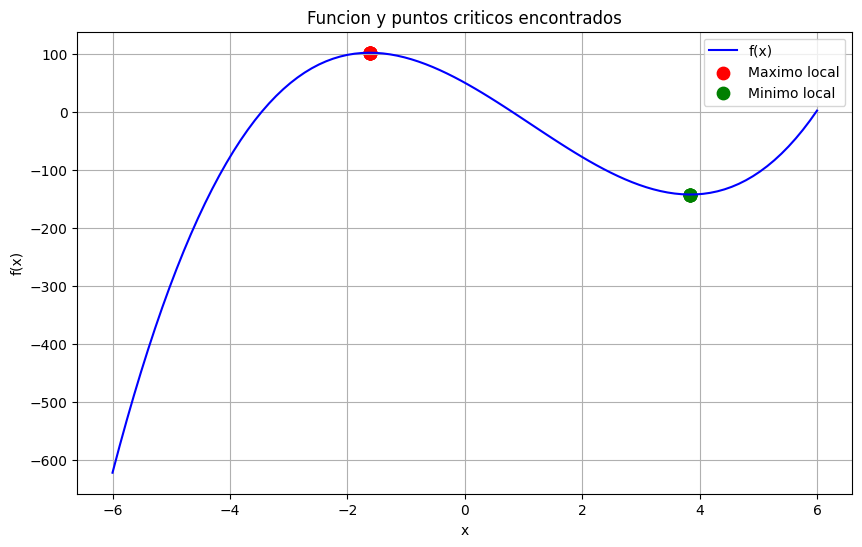

In [67]:
x_vals = np.linspace(-6, 6, 100)
y_vals = funcion_np(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='blue')

for (x_0, x_sol, y_sol, tipo, alpha) in resultados:
    if tipo == "Minimo local":
        plt.scatter(x_sol, y_sol, color='green', s=80, label='Minimo local' if 'Minimo local' not in [r[3] for r in resultados[:resultados.index((x_0, x_sol, y_sol, tipo, alpha))]] else "")
    elif tipo == "Maximo local":
        plt.scatter(x_sol, y_sol, color='red', s=80, label='Maximo local' if 'Maximo local' not in [r[3] for r in resultados[:resultados.index((x_0, x_sol, y_sol, tipo, alpha))]] else "")

plt.title("Funcion y puntos criticos encontrados")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Problema 2: Análisis de Extremos Locales y Globales

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos el x y la funcion 
x = sp.symbols('x')
funcion = x**5 - 8*x**3 + 10*x + 6

# Calculamos la primera y segunda derivada
gradiente = sp.diff(funcion, x)
hessiana = sp.diff(gradiente, x)

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify(x, funcion, 'numpy')
gradiente_np = sp.lambdify(x, gradiente, 'numpy')
hessiana_np = sp.lambdify(x, hessiana, 'numpy')

# Implementamos Newton-Raphson
def newton_raphson(gradiente_np, hessiana_np, x_0, alpha , tol = 1e-7, max_iter = 100):
    x_k = x_0

    for k in range(max_iter):
        gradiente_x = gradiente_np(x_k)
        hessiana_x = hessiana_np(x_k) 

        if abs(hessiana_x) < 1e-10:
            hessiana_x = 1e-10 if hessiana_x >= 0 else -1e-10

        x_k1 = x_k - alpha * (gradiente_x/hessiana_x)

        if abs(gradiente_np(x_k1)) < tol:
            return x_k1
        
        x_k = x_k1

    return x_k

# Determinamos los diferentes valores iniciales de x_0 y alpha
x_iniciales = [-3, -1, 1, 3]
alphas = [0.2, 0.1]
resultados = []

# Obtenemos los extremos
for x_0 in x_iniciales:
    for alpha in alphas:
        solucion = newton_raphson(gradiente_np, hessiana_np, x_0, alpha)

        valor_funcion = funcion_np(solucion)
        valor_segunda_derivada = hessiana_np(solucion)

        if valor_segunda_derivada > 0:
            tipo = "Minimo local"
        elif valor_segunda_derivada < 0:
            tipo = "Maximo local"
        else:
            tipo = "Punto de inflexion"

        resultados.append((x_0, round(solucion, 2), round(valor_funcion, 4), alpha, tipo))

# Eliminamos los duplicados
unicos = []
for r in resultados:
    if not any(abs(r[0] - p[0]) < 0.05 for p in unicos):
        unicos.append(r)

# Sacamos el maximo y el minimo global 
minimo_global = min(unicos, key=lambda r: r[1])
maximo_global = max(unicos, key=lambda r: r[1])
unicos = [r for r in unicos if r != minimo_global and r != maximo_global]

print("Puntos criticos unicos:")
for r in unicos:
    print(f"x_0 = {r[0]}, x* = {r[1]:.6f}, f(x*) = {r[2]:.6f}, α = {r[3]:.3f}, {r[4]}")

print("")
print("Minimo global:")
print(f"x_0 = {r[0]}, x = {minimo_global[1]:.6f}, f(x) = {minimo_global[2]:.6f}, α = {r[3]:.3f}")

print("")
print("Maximo global:")
print(f"x_0 = {r[0]}, x = {maximo_global[1]:.6f}, f(x) = {maximo_global[2]:.6f}, α = {r[3]:.3f}")


Puntos criticos unicos:
x_0 = -1, x* = -0.680000, f(x*) = 1.570000, α = 0.200, Minimo local
x_0 = 1, x* = 0.680000, f(x*) = 10.430000, α = 0.200, Maximo local

Minimo global:
x_0 = 1, x = -2.080000, f(x) = 18.258800, α = 0.200

Maximo global:
x_0 = 1, x = 2.080000, f(x) = -6.258800, α = 0.200


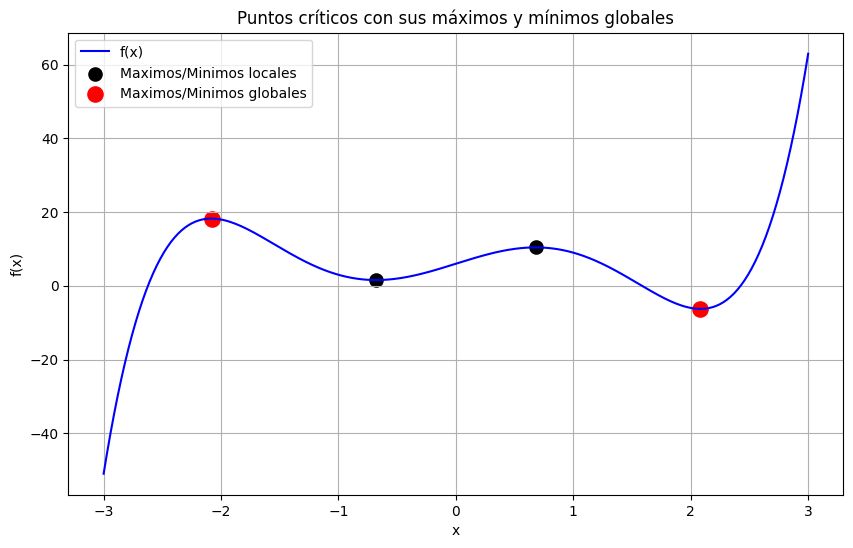

In [79]:
x_vals = np.linspace(-3, 3, 400)
y_vals = funcion_np(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color='blue', label='f(x)')

for (x_0, x_sol, y_sol, alpha, tipo) in unicos:
    plt.scatter(x_sol, y_sol, color='black', s=90)

plt.scatter(minimo_global[1], minimo_global[2], color='red', s=120)
plt.scatter(maximo_global[1], maximo_global[2], color='red', s=120)

plt.title("Puntos críticos con sus máximos y mínimos globales")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.scatter([], [], color='black', s=90, label='Maximos/Minimos locales')
plt.scatter([], [], color='red', s=120, label='Maximos/Minimos globales')
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Problema 3: Newton-Raphson Multidimensional

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos los simbolos y la funcion 
x = sp.symbols('x')
y = sp.symbols('y')
funcion = (x - 1)**2 + 100*(y - x**2)**2

# Calculamos la primera y segunda derivada
gradiente = [sp.diff(funcion, var) for var in (x, y)]
hessiana = sp.hessian(funcion, (x, y))

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify((x,y), funcion, 'numpy')
gradiente_np = sp.lambdify((x,y), gradiente, 'numpy')
hessiana_np = sp.lambdify((x,y), hessiana, 'numpy')

# Implementamos Newton-Raphson 2D
def newton_raphson_2D(gradiente_np, hessiana_np, x_0, y_0, alpha, tol = 1e-7, max_iter = 100):
    x_k, y_k = x_0, y_0
    trayectoria = [(x_k, y_k)]

    for k in range(max_iter):
        gradiente_xy = np.array(gradiente_np(x_k, y_k))
        hessiana_xy = np.array(hessiana_np(x_k, y_k))
        
        if np.linalg.det(hessiana_xy) == 0:
            print(f"La Hessiana no es invertible en la iteracion {k}" )
            break 
        
        delta = np.linalg.solve(hessiana_xy, gradiente_xy)

        x_k1, y_k1 = np.array([x_k, y_k]) - alpha * delta
        trayectoria.append((x_k1, y_k1))

        if np.linalg.norm(gradiente_xy) < tol:
            print(f"Convergencia alcanzada en {k+1} iteraciones")
            return (x_k1, y_k1), trayectoria
        
        x_k, y_k = x_k1, y_k1

    return (x_k, y_k), trayectoria

# Ejecutamos el Newton Raphson en el punto inicial 
alpha = 0.2
(x_min, y_min), trayectoria = newton_raphson_2D(gradiente_np, hessiana_np, 0, 10, alpha)
print(f"x_0 = 0, y_0 = 10, (x*, y*) = ({x_min:.6f}, {y_min:.6f}), f(x*, y*) = {funcion_np(x_min, y_min):.6f}, α = {alpha:.3f}")

x_0 = 0, y_0 = 10, (x*, y*) = (0.999746, 0.999486), f(x*, y*) = 0.000000, α = 0.200


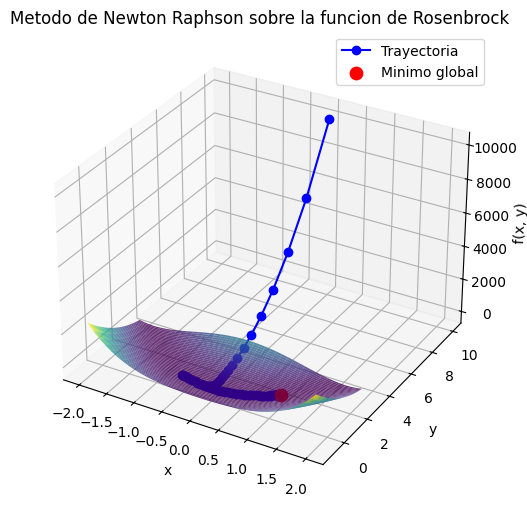

In [112]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcion_np(X, Y)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, rstride=10, cstride=10, edgecolor='none')
trayectoria = np.array(trayectoria)
Z_tray = funcion_np(trayectoria[:, 0], trayectoria[:, 1])
ax.plot(trayectoria[:, 0], trayectoria[:, 1], Z_tray, color='blue', marker='o', label='Trayectoria')
ax.scatter(trayectoria[-1, 0], trayectoria[-1, 1], Z_tray[-1], color='red', s=80, label='Minimo global')

ax.set_title('Metodo de Newton Raphson sobre la funcion de Rosenbrock')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()

## Problema 4: Gradiente Descendente en Optimización

## Problema 5: Descenso de Gradiente y Descenso de Gradiente Basado en Momento